# Ciencia de Datos en Python 

### 2 datasets: entrenamiento(80 %) y validacion y pruebas(20 %)

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Carga del dataset

In [13]:
datos = np.load("C:\\Users\\Ricardo\\Documents\\Ciencia_de_Datos_Python\\U\\Proyecto Final\\proyecto_training_data.npy")

## Separación de datos en entrenamiento y validación

In [14]:
np.random.seed(42)
indices = np.random.permutation(len(datos))
entrenamiento = datos[indices[:int(0.8 * len(datos))]]
validacion = datos[indices[int(0.8 * len(datos)):]]

## Análisis exploratorio con Pandas

In [15]:
df_entrenamiento = pd.DataFrame(entrenamiento)
df_validacion = pd.DataFrame(validacion)

print("**Análisis exploratorio - Entrenamiento:**")
print(df_entrenamiento.describe())

print("**Análisis exploratorio - Validación:**")
print(df_validacion.describe())

**Análisis exploratorio - Entrenamiento:**
                   0            1            2            3            4  \
count    1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean   181081.876712     6.095034  1161.268836     6.532534  1971.120719   
std     81131.228007     1.403402   393.541120     1.627412    30.279560   
min     34900.000000     1.000000   334.000000     2.000000  1872.000000   
25%    129975.000000     5.000000   873.500000     5.000000  1954.000000   
50%    162950.000000     6.000000  1079.500000     6.000000  1972.000000   
75%    214000.000000     7.000000  1392.000000     7.000000  2000.000000   
max    755000.000000    10.000000  4692.000000    14.000000  2009.000000   

                5  
count  964.000000  
mean    70.271784  
std     25.019386  
min     21.000000  
25%     59.000000  
50%     69.500000  
75%     80.000000  
max    313.000000  
**Análisis exploratorio - Validación:**
                   0           1            2       

## Distribución de las variables

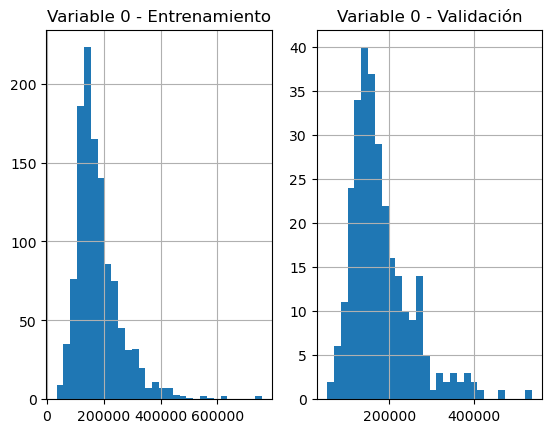

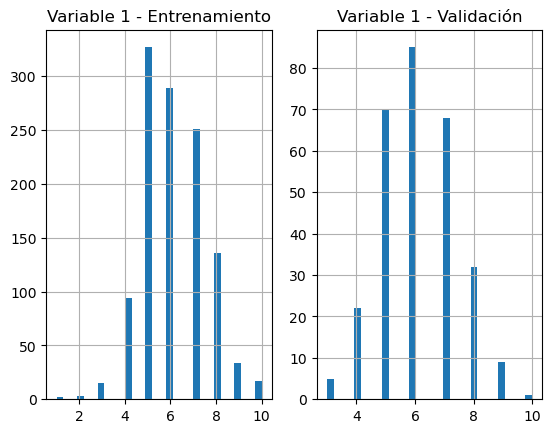

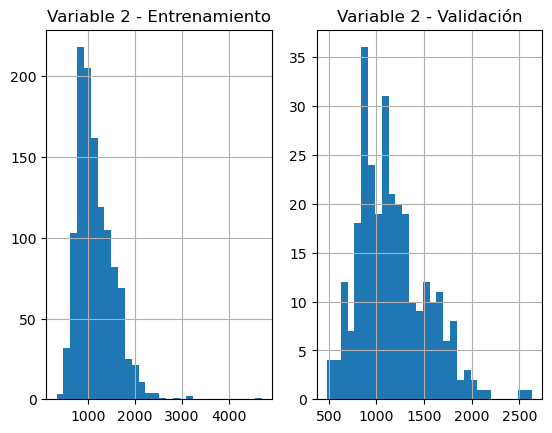

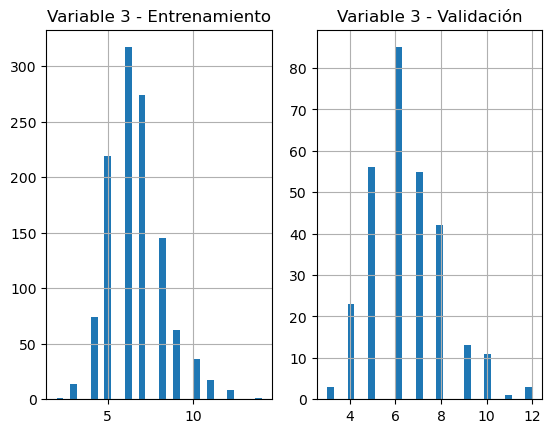

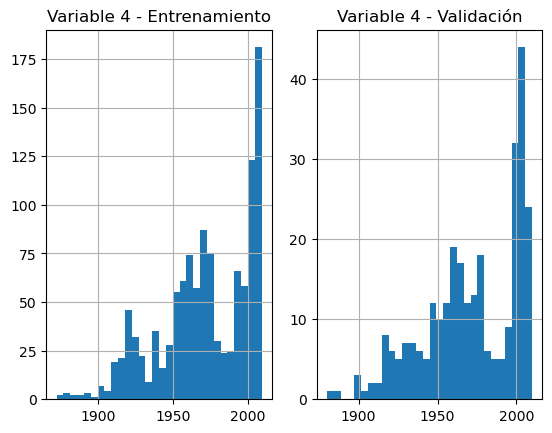

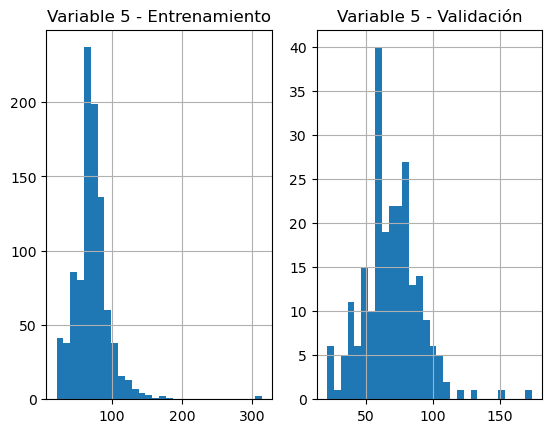

In [16]:
for col in df_entrenamiento.columns:
    plt.subplot(121)
    df_entrenamiento[col].hist(bins=30)
    plt.title(f"Variable {col} - Entrenamiento")
    plt.subplot(122)
    df_validacion[col].hist(bins=30)
    plt.title(f"Variable {col} - Validación")
    plt.show()

## Cálculo del coeficiente de correlación

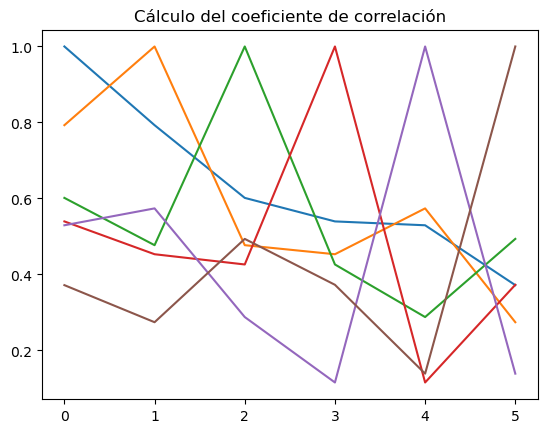

In [22]:
correlaciones = df_entrenamiento.corr()
correlaciones
plt.plot(np.array(correlaciones))
plt.title("Cálculo del coeficiente de correlación")
plt.show()

## Selección de las variables con mayor correlación

In [18]:
correlaciones_filtradas = correlaciones.filter(like="variable_dependiente")
for col in correlaciones_filtradas.columns:
    if abs(correlaciones_filtradas.loc["variable_dependiente", col]) > 0.5:
        variables_independientes.append(col)


## Función para entrenar un modelo de regresión lineal

In [19]:
def entrenar_regresion_lineal(x, y, epochs, alpha, imprimir_error_cada):
    # Inicialización de variables
    theta = np.zeros(2)
    errores = []
    historial_modelos = {}

    # Entrenamiento del modelo
    for i in range(epochs):
        # Cálculo de la predicción
        y_pred = np.dot(x, theta)
        print(y_pred)

        # Cálculo del error
        error = np.mean((y - y_pred) ** 2)
        errores.append(error)
        print(error)

        # Cálculo del gradiente
        gradiente = np.dot(x.T, (y_pred - y)) / len(y)
        print(gradiente)

        # Actualización de los parámetros
        theta -= alpha * gradiente
        print(theta)

        # Almacenamiento del modelo
        if i % imprimir_error_cada == 0:
            historial_modelos[i] = theta.copy()

        # Impresión del error
        if i % imprimir_error_cada == 0:
            print(f"Iteración: {i}, Error: {error}")

    return errores, historial_modelos

# Entrenamiento de modelos para las variables independientes
for variable in variables_independientes:
    x_entrenamiento = df_entrenamiento[variable].to_numpy()
    x_validacion = df_validacion[variable].to_numpy()
    y_entrenamiento = df_entrenamiento["variable_dependiente"].to_numpy()
    y_validacion = df_validacion["variable_dependiente"].to_numpy()

    errores_entrenamiento, historial_modelos_entrenamiento = entrenar_regresion_lineal(
        np.column_stack((x_entrenamiento, np.ones(len(x_entrenamiento)))),
        y_entrenamiento,
        epochs=100,
        alpha=0.01,
        imprimir_error_cada=10,
    )

    errores_validacion, _ = entrenar_regresion_lineal(
        np.column_stack((x_validacion, np.ones(len(x_validacion)))),
        y_validacion,
        epochs=100,
        alpha=0.01,
        imprimir_error_cada=10,
    )


## Visualización de las curvas de aprendizaje

In [20]:
plt.plot(np.array(errores_entrenamiento))
plt.title("Curva de aprendizaje - Entrenamiento")
plt.show()

plt.plot(np.array(errores_validacion))
plt.title("Curva de aprendizaje - Validación")
plt.show()

NameError: name 'errores_entrenamiento' is not defined